In [ ]:
# Loading Necessary packages 

import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # visualization
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Surface Roughness.xlsx to Surface Roughness (1).xlsx


In [ ]:
import io
df2 = pd.read_excel(io.BytesIO(uploaded['Surface Roughness.xlsx']))# Dataset is now stored in a Pandas Dataframe

In [ ]:
# Reading data
data = pd.read_excel('Surface Roughness.xlsx')
data.sample(n=5)

,depth of cut (mm),feed (m/rev),cutting speed (m/min),cutting force (N),tool vibration (mm),tool wear (mm),Surface roughness
24,0.6,0.12,80,360.2,0.010,0.06,1.488
4,0.4,0.10,100,252.7,0.032,0.03,1.089
14,0.5,0.10,120,241.3,0.044,0.02,1.056
6,0.4,0.12,80,304.2,0.026,0.04,1.242
10,0.5,0.08,100,242.7,0.045,0.02,1.098


In [ ]:
data.describe()

,depth of cut (mm),feed (m/rev),cutting speed (m/min),cutting force (N),tool vibration (mm),tool wear (mm),Surface roughness
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.496154,0.099231,99.230769,268.988462,0.033654,0.030385,1.154423
std,0.082369,0.016474,16.473755,42.945420,0.012582,0.013706,0.158464
min,0.400000,0.080000,80.000000,168.400000,0.010000,0.010000,0.795000
25%,0.400000,0.080000,80.000000,243.175000,0.026000,0.020000,1.065500
50%,0.500000,0.100000,100.000000,269.100000,0.032000,0.030000,1.153500
75%,0.600000,0.120000,120.000000,297.550000,0.043500,0.040000,1.275250
max,0.600000,0.120000,120.000000,360.200000,0.059000,0.060000,1.488000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

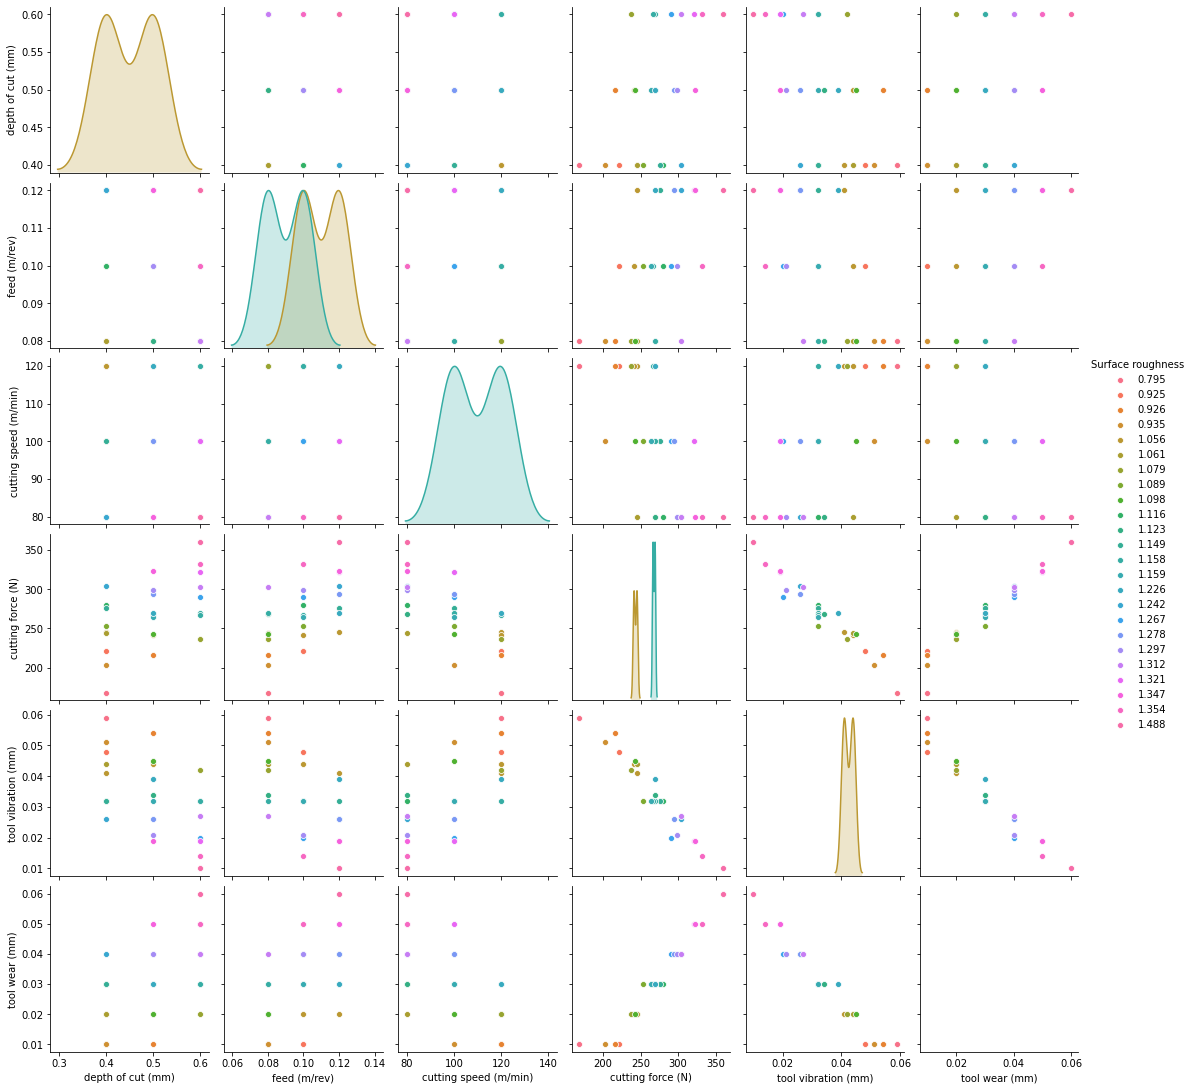

In [ ]:
sns.pairplot( data=data, vars=('depth of cut (mm)','feed (m/rev)','cutting speed (m/min)','cutting force (N)','tool vibration (mm)','tool wear (mm)'), hue='Surface roughness' )
plt.savefig('Figure', dpi = 300)

# **Normalize the Data**

In [ ]:
df_norm = data[['depth of cut (mm)', 'feed (m/rev)', 'cutting speed (m/min)', 'cutting force (N)','tool vibration (mm)','tool wear (mm)']].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))
df_norm.sample(n=5)

,depth of cut (mm),feed (m/rev),cutting speed (m/min),cutting force (N),tool vibration (mm),tool wear (mm)
6,-0.480769,0.519231,-0.480769,0.183585,-0.156201,0.192308
14,0.019231,0.019231,0.519231,-0.144361,0.211146,-0.207692
24,0.519231,0.519231,-0.480769,0.475555,-0.482732,0.592308
7,-0.480769,0.519231,0.019231,0.038121,-0.033752,-0.007692
18,0.519231,-0.480769,-0.480769,0.178371,-0.135793,0.192308


In [ ]:
target = data[['Surface roughness']]
target.sample(5)

,Surface roughness
3,1.116
21,1.354
16,1.278
2,0.795
17,1.226


In [ ]:
df = pd.concat([df_norm, target], axis = 1)
df.sample(5)
df.shape

(26, 7)

# **Seperating the Train Data and Test Data**

In [ ]:
train_test_per = 0.8
train_data = df.iloc[:round((len(df)*train_test_per)), :]
train_data.shape

(21, 7)

In [ ]:
test_data_per = 1-train_test_per
test_data = df.iloc[:round((len(df)*test_data_per)), :]
test_data.shape

(5, 7)

In [ ]:
# Adding Bias Unit in Input layer for Train Data
b = np.ones((len(train_data),1)) 
b.shape

(21, 1)

In [ ]:
# Adding Bias Unit in Input layer for Test Data
b_test = np.ones((len(test_data),1)) 
b_test.shape

(5, 1)

In [ ]:
X = np.concatenate([b,train_data.values[:, : 6]], axis = 1)
X.shape

(21, 7)

In [ ]:
X_test = np.concatenate([b_test,test_data.values[:, : 6]], axis = 1)
X_test.shape

(5, 7)

In [ ]:
vec_y = train_data.values[:, 6]
y = np.reshape(vec_y, (b.shape))
y.shape

(21, 1)

In [ ]:
vec_y_test = test_data.values[:, 6]
y_test = np.reshape(vec_y_test, b_test.shape)
y_test.shape

(5, 1)

# **Back Propagation and seeding initial Weight**

In [ ]:
num_inputs = len(X[0])
hidden_layer_neurons = 6
np.random.seed(5)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[-0.55601366,  0.74146461, -0.58656169,  0.83722182, -0.02317762,
         0.22348773],
       [ 0.53181571,  0.03683598, -0.406399  , -0.62455754, -0.83851746,
         0.47688059],
       [-0.11738155, -0.68338026,  0.75987406, -0.45182708, -0.17152996,
        -0.40784013],
       [ 0.25757582,  0.15967562,  0.19985839, -0.46836176, -0.43062824,
        -0.49282359],
       [-0.3448721 , -0.7116714 , -0.66877428,  0.92786106,  0.92045343,
        -0.62317069],
       [-0.95138688, -0.59088891,  0.39968723,  0.55902917, -0.95413382,
         0.15532572],
       [-0.99671565,  0.03094522,  0.27959035,  0.97124881, -0.48180481,
         0.60499377]])

In [ ]:
num_inputs = len(X[0])
hidden_layer_neurons = 6
np.random.seed(5)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[-0.55601366,  0.74146461, -0.58656169,  0.83722182, -0.02317762,
         0.22348773],
       [ 0.53181571,  0.03683598, -0.406399  , -0.62455754, -0.83851746,
         0.47688059],
       [-0.11738155, -0.68338026,  0.75987406, -0.45182708, -0.17152996,
        -0.40784013],
       [ 0.25757582,  0.15967562,  0.19985839, -0.46836176, -0.43062824,
        -0.49282359],
       [-0.3448721 , -0.7116714 , -0.66877428,  0.92786106,  0.92045343,
        -0.62317069],
       [-0.95138688, -0.59088891,  0.39968723,  0.55902917, -0.95413382,
         0.15532572],
       [-0.99671565,  0.03094522,  0.27959035,  0.97124881, -0.48180481,
         0.60499377]])

In [ ]:
num_outputs = 1
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[ 0.74096617],
       [ 0.84549923],
       [-0.99557157],
       [-0.06102326],
       [ 0.96293748],
       [-0.20211039]])

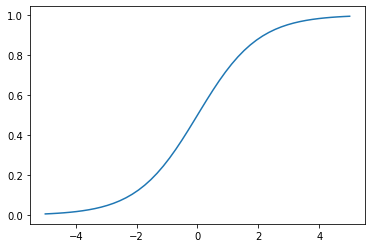

In [ ]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

# **Training the Network using Back Propagation**

In [ ]:
learning_rate = 0.2 
for epoch in range(50000):
    a1 = 1/(1 + np.exp(-(np.dot(X, w1)))) # sigmoid function
    a2 = 1/(1 + np.exp(-(np.dot(a1, w2))))
    er = (abs(y - a2)).mean()
    a2_delta = (y - a2)*(a2 * (1-a2))
    a1_delta = a2_delta.dot(w2.T) * (a1 * (1-a1))
    w2 += a1.T.dot(a2_delta) * learning_rate
    w1 += X.T.dot(a1_delta) * learning_rate
print('Error:', er)

Error: 0.13733531875190078


In [ ]:
a1 = 1/(1 + np.exp(-(np.dot(X_test, w1))))
a2 = 1/(1 + np.exp(-(np.dot(a1, w2))))

y_predicted = np.round(a2,5)
y_predicted

array([[0.99899],
       [0.93951],
       [0.78962],
       [0.99999],
       [0.99989]])

In [ ]:
y_test

array([[1.061],
       [0.935],
       [0.795],
       [1.116],
       [1.089]])

In [ ]:
compare = np.concatenate([y_test, y_predicted], axis =1)
type(compare)

numpy.ndarray

In [ ]:
df2 = pd.DataFrame(compare, columns = ['y_test', 'y_predicted'])

In [ ]:
df2

,y_test,y_predicted
0,1.061,0.99899
1,0.935,0.93951
2,0.795,0.78962
3,1.116,0.99999
4,1.089,0.99989


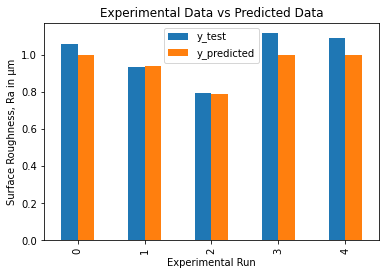

In [ ]:
df2.plot.bar()
plt.ylabel('Surface Roughness, Ra in µm')
plt.xlabel('Experimental Run')
plt.title('Experimental Data vs Predicted Data')
plt.savefig('barfig', dpi = 300)